In [1]:
# prerequisites 
import csv
import os
import matplotlib.pyplot as plt
import numpy as np  
from sklearn import linear_model
from math import log, sqrt

In [27]:
def standardNormalize(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    normalized_data = (data - mean) / std_dev
    return normalized_data

In [29]:
def normalize(data):
    rdata = [(x-min(data))/(max(data)-min(data)) for x in data]
    return rdata
# Normalizare
# prediction error (manual):  0.01
# prediction error (tool):   0.01
# Fara normalizare:
# prediction error (manual):  0.41
# prediction error (tool):   0.41

In [ ]:
# doar de Produsul intern brut (exemplu detaliat live - demo)

in:   [1.51846129 1.19291257 1.18866356 1.39345824 1.09867865]
out:  [1.93599602 1.92269283 1.90672969 1.89786089 1.87568934]


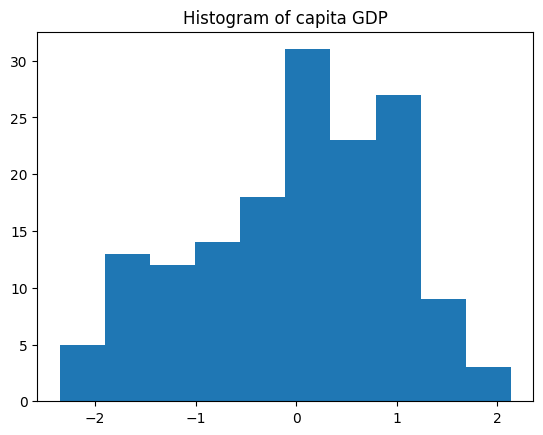

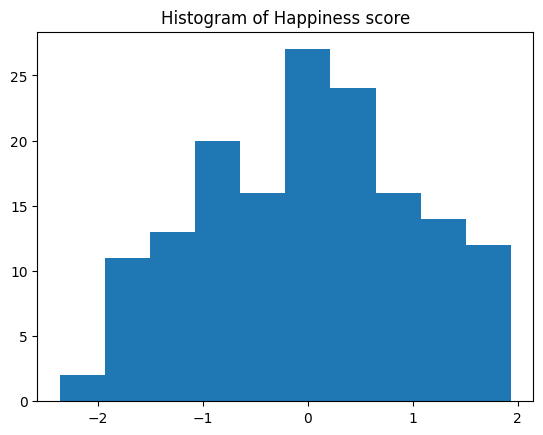

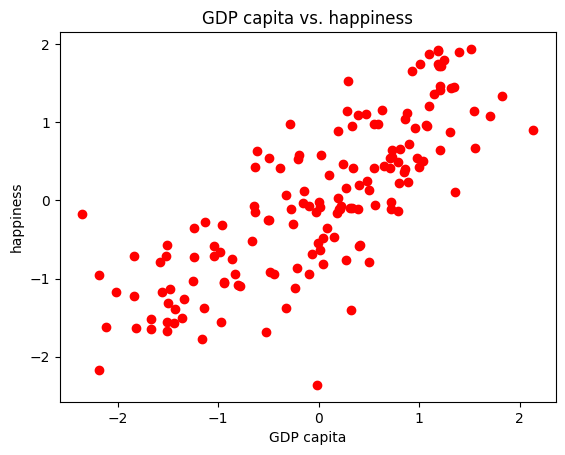

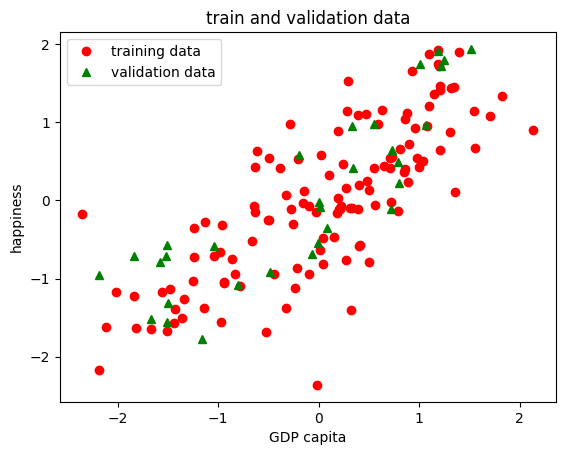

the learnt model: f(x) =  -0.03438624791896079  +  0.7771962750773721  * x


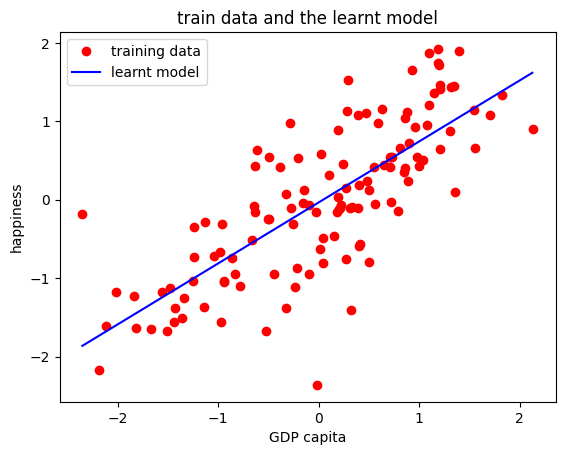

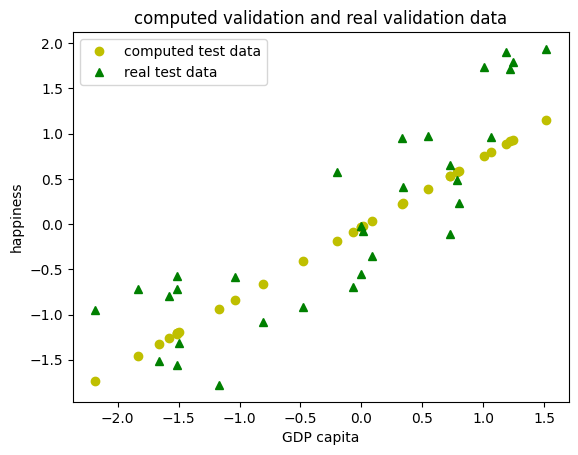

Normalizare
prediction error (manual):  0.33174870241413523
prediction error (tool):   0.33174870241413523
Fara normalizare:
prediction error (manual):  0.4142120438505252
prediction error (tool):   0.41421204385052524


In [28]:
def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    
    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(row[selectedVariable]) if row[selectedVariable] != '' else None for row in data]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(row[selectedOutput]) for row in data]

    # calculam media la valorile input
    values = [float(row[selectedVariable]) for row in data if row[selectedVariable] != '' and row[selectedVariable] != 0]
    mean_value = sum(values) / len(values)
    
    # Înlocuim valorile nule cu media calculată
    for i in range(len(inputs)):
        if inputs[i] is None or inputs[i]==0:
            inputs[i] = mean_value

    inputs = standardNormalize(inputs)
    outputs = standardNormalize(outputs)
    
    return inputs, outputs
    
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'D:/FACULTATE/SEM4/AI/Lab5/v2_world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])


def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogram(inputs, 'capita GDP')
plotDataHistogram(outputs, 'Happiness score')


plt.plot(inputs, outputs, 'ro') 
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.title('GDP capita vs. happiness')
plt.show()

np.random.seed(5)
indexes = [i for i in range(len(inputs))]

trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
validationSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')   #train data 
plt.plot(validationInputs, validationOutputs, 'g^', label = 'validation data')     #test data 
plt.title('train and validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

xx = [[el] for el in trainInputs]


regressor = linear_model.LinearRegression()
regressor.fit(xx, trainOutputs)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')


# plot the learnt model
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref] 

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')  #train data 
plt.plot(xref, yref, 'b-', label = 'learnt model')                  #model 
plt.title('train data and the learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()


computedValidationOutputs = regressor.predict([[x] for x in validationInputs])


plt.plot(validationInputs, computedValidationOutputs, 'yo', label = 'computed test data')  #computed test data 
plt.plot(validationInputs, validationOutputs, 'g^', label = 'real test data')  #real test data 
plt.title('computed validation and real validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()


error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print("Normalizare")
print('prediction error (manual): ', error)

# by using sklearn 
from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('prediction error (tool):  ', error)

print("Fara normalizare:")
print("prediction error (manual):  0.4142120438505252")
print("prediction error (tool):   0.41421204385052524")

In [6]:
# doar de caracteristica "Family" (tema)

in:   [1.24875829 1.31397666 1.53430752 1.18719484 1.27367436]
out:  [1.93599602 1.92269283 1.90672969 1.89786089 1.87568934]


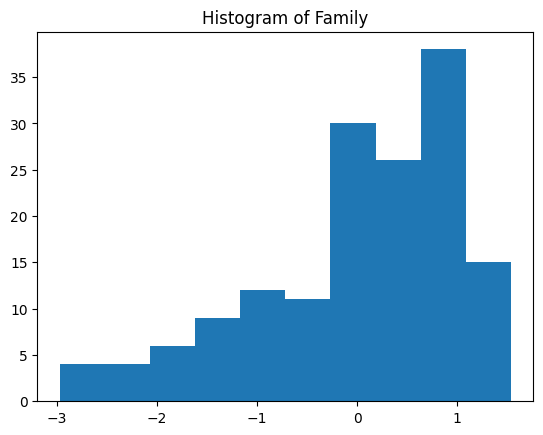

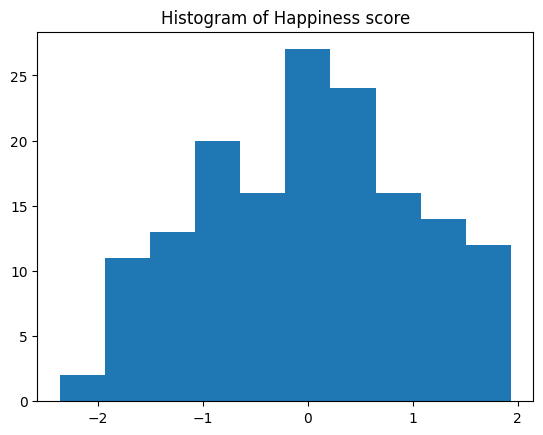

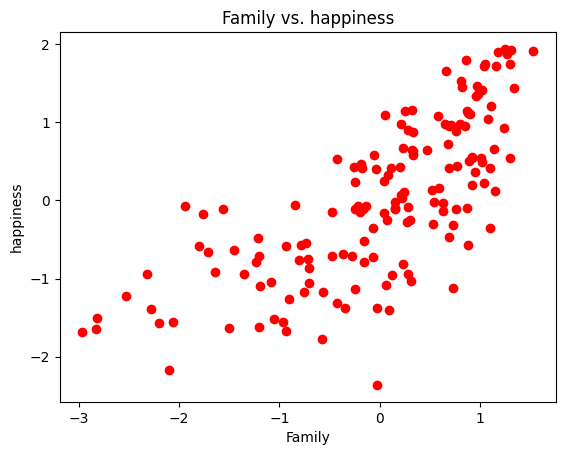

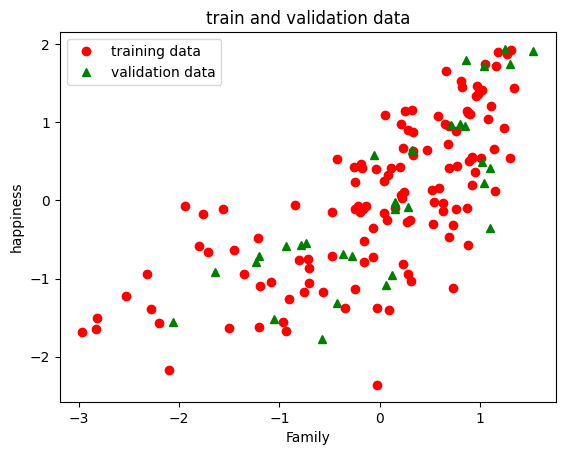

the learnt model: f(x) =  0.013139103584288787  +  0.6915426403645687  * x


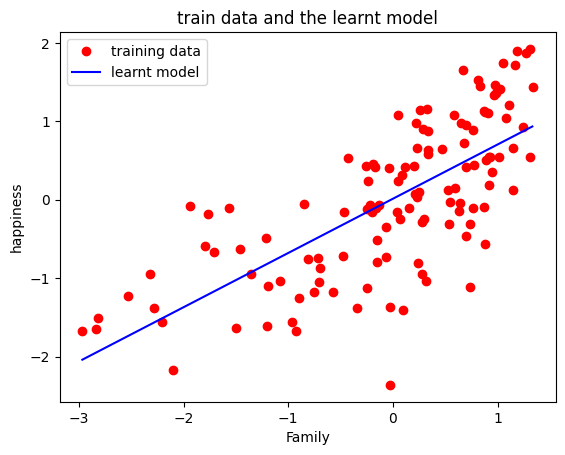

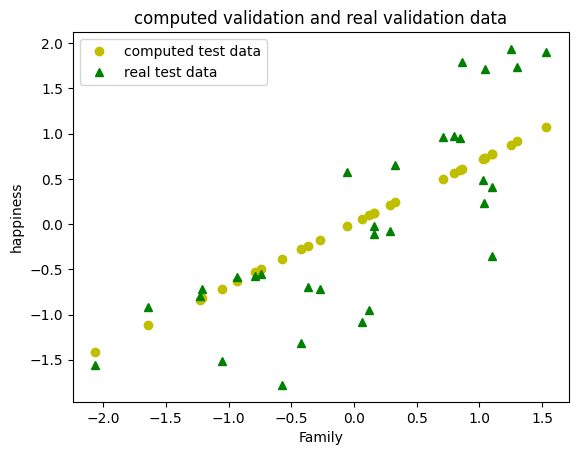

Normalizare:
prediction error (manual):  0.4638548180919693
prediction error (tool):   0.46385481809196916
Fara normalizare:
prediction error (manual):  0.5897568470925796
prediction error (tool):   0.5897568470925795


In [24]:
def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    
    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(row[selectedVariable]) if row[selectedVariable] != '' else None for row in data]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(row[selectedOutput]) for row in data]

    # calculam media la valorile input
    values = [float(row[selectedVariable]) for row in data if row[selectedVariable] != '']
    mean_value = sum(values) / len(values)
    
    # Înlocuim valorile nule cu media calculată
    for i in range(len(inputs)):
        if inputs[i] is None or inputs[i]==0:
            inputs[i] = mean_value

    inputs = standardNormalize(inputs)
    outputs = standardNormalize(outputs)
    
    return inputs, outputs
    
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'D:/FACULTATE/SEM4/AI/Lab5/v2_world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Family', 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])


def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogram(inputs, 'Family')
plotDataHistogram(outputs, 'Happiness score')


plt.plot(inputs, outputs, 'ro') 
plt.xlabel('Family')
plt.ylabel('happiness')
plt.title('Family vs. happiness')
plt.show()

np.random.seed(5)
indexes = [i for i in range(len(inputs))]

trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
validationSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')   #train data 
plt.plot(validationInputs, validationOutputs, 'g^', label = 'validation data')     #test data 
plt.title('train and validation data')
plt.xlabel('Family')
plt.ylabel('happiness')
plt.legend()
plt.show()

xx = [[el] for el in trainInputs]


regressor = linear_model.LinearRegression()
regressor.fit(xx, trainOutputs)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')


# plot the learnt model
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref] 

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')  #train data 
plt.plot(xref, yref, 'b-', label = 'learnt model')                  #model 
plt.title('train data and the learnt model')
plt.xlabel('Family')
plt.ylabel('happiness')
plt.legend()
plt.show()


computedValidationOutputs = regressor.predict([[x] for x in validationInputs])


plt.plot(validationInputs, computedValidationOutputs, 'yo', label = 'computed test data')  #computed test data 
plt.plot(validationInputs, validationOutputs, 'g^', label = 'real test data')  #real test data 
plt.title('computed validation and real validation data')
plt.xlabel('Family')
plt.ylabel('happiness')
plt.legend()
plt.show()


error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print("Normalizare:")
print('prediction error (manual): ', error)

# by using sklearn 
from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('prediction error (tool):  ', error)

print("Fara normalizare:")
print("prediction error (manual):  0.5897568470925796")
print("prediction error (tool):   0.5897568470925795")

In [ ]:
# de Produsul intern brut si de gradul de libertate (temă).

in1:  [1.50618765 1.18651768 1.1823454  1.38344191 1.09398544]
in2:  [1.50618765 1.18651768 1.1823454  1.38344191 1.09398544]
out:  [1.93599602 1.92269283 1.90672969 1.89786089 1.87568934]


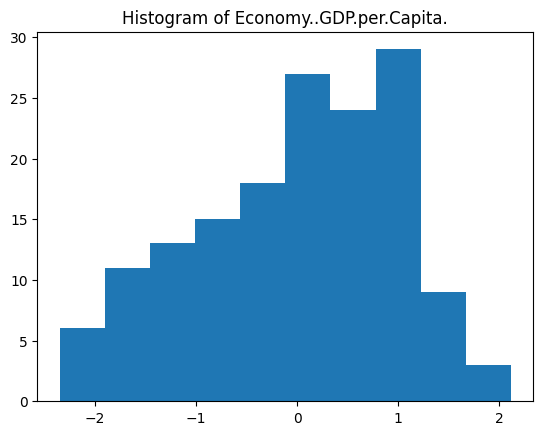

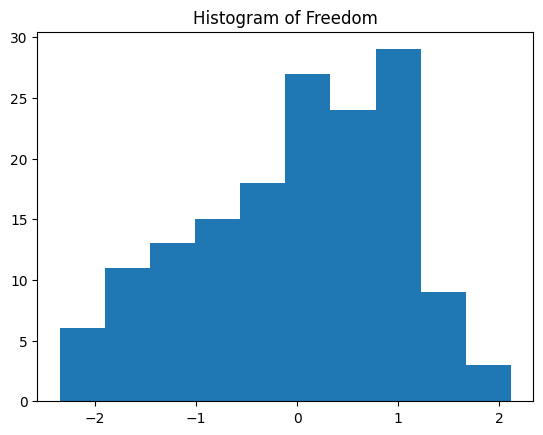

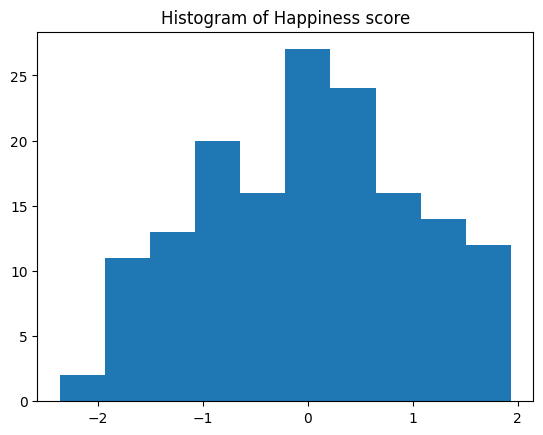

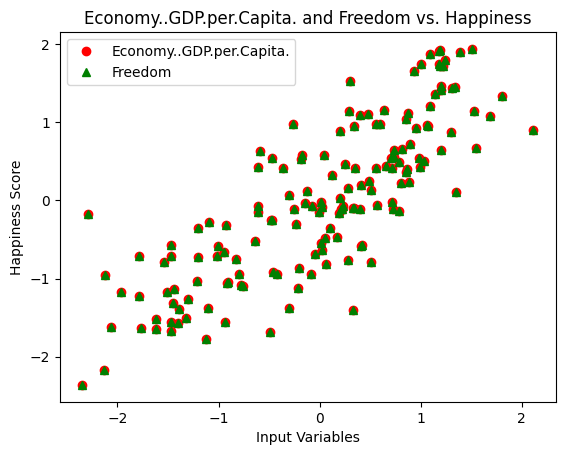

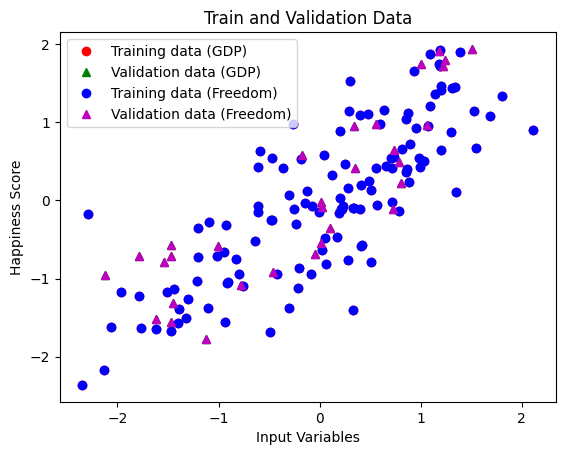

The learnt model: f(x1, x2) =  -0.03171845034372571  +  -25527.075290974703  * x1 +  25527.87517545569  * x2


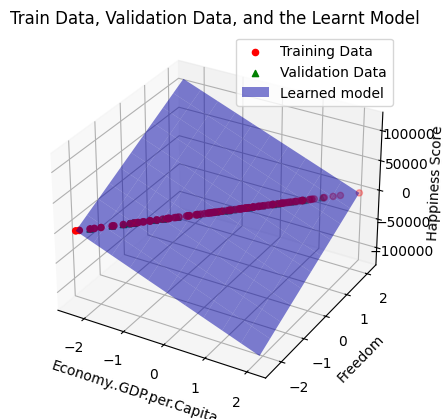

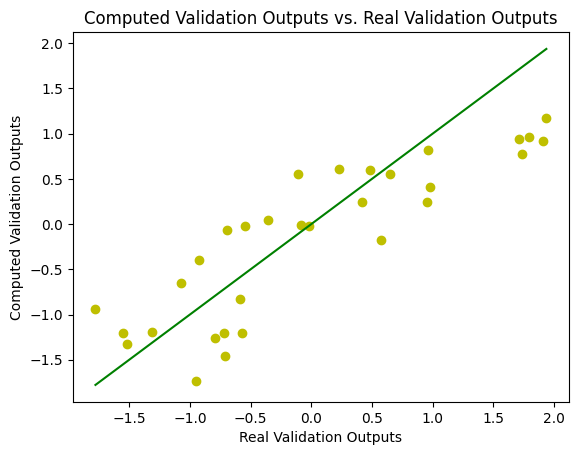

Normalizare
Prediction error (tool):  0.3257841222679867
prediction error (tool):   0.3257841222679867
Fara normalizare:
prediction error (tool):  0.4218494215145122
prediction error (tool):   0.4218494215145122


In [23]:
from math import log, sqrt
import csv
import os
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def loadData(fileName, inputVariabName1, inputVariabName2, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable1 = dataNames.index(inputVariabName1)
    inputs1 = [float(row[selectedVariable1]) if row[selectedVariable1] != '' else None for row in data]
    selectedVariable2 = dataNames.index(inputVariabName2)
    inputs2 = [float(row[selectedVariable2]) if row[selectedVariable2] != '' else None for row in data]

    mean_value1 = sum([val for val in inputs1 if val is not None]) / len([val for val in inputs1 if val is not None])
    mean_value2 = sum([val for val in inputs2 if val is not None]) / len([val for val in inputs2 if val is not None])

    for i in range(len(inputs1)):
        if inputs1[i] is None:
            inputs1[i] = mean_value1
        if inputs2[i] is None:
            inputs2[i] = mean_value2

    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(row[selectedOutput]) for row in data]


    inputs1 = standardNormalize(inputs1)
    inputs2 = standardNormalize(inputs2)
    outputs = standardNormalize(outputs)
    
    return inputs1, inputs2, outputs


crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'data', 'D:/FACULTATE/SEM4/AI/Lab5/v2_world-happiness-report-2017.csv')

inputs1, inputs2, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Freedom', 'Happiness.Score')
print('in1: ', inputs1[:5])
print('in2: ', inputs2[:5])
print('out: ', outputs[:5])

# Plot the histograms associated with input data and output data

def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogram(inputs1, 'Economy..GDP.per.Capita.')
plotDataHistogram(inputs2, 'Freedom')
plotDataHistogram(outputs, 'Happiness score')

# Check linearity

plt.plot(inputs1, outputs, 'ro', label='Economy..GDP.per.Capita.') 
plt.plot(inputs2, outputs, 'g^', label='Freedom') 
plt.xlabel('Input Variables')
plt.ylabel('Happiness Score')
plt.title('Economy..GDP.per.Capita. and Freedom vs. Happiness')
plt.legend()
plt.show()

# Combine inputs into one matrix
X = np.column_stack((inputs1, inputs2))


np.random.seed(5)
indexes = np.arange(len(inputs1))

trainSample = np.random.choice(indexes, int(0.8 * len(inputs1)), replace=False)
validationSample = np.array([i for i in indexes if i not in trainSample])

trainInputs = X[trainSample]
trainOutputs = np.array([outputs[i] for i in trainSample])

validationInputs = X[validationSample]
validationOutputs = np.array([outputs[i] for i in validationSample])

# Plot train and validation data
plt.plot(trainInputs[:,0], trainOutputs, 'ro', label='Training data (GDP)')   
plt.plot(validationInputs[:,0], validationOutputs, 'g^', label='Validation data (GDP)')     
plt.plot(trainInputs[:,1], trainOutputs, 'bo', label='Training data (Freedom)')   
plt.plot(validationInputs[:,1], validationOutputs, 'm^', label='Validation data (Freedom)')  
plt.title('Train and Validation Data')
plt.xlabel('Input Variables')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

# Model initialization and training
regressor = linear_model.LinearRegression()
regressor.fit(trainInputs, trainOutputs)

# Retrieve model parameters
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
print('The learnt model: f(x1, x2) = ', w0, ' + ', w1, ' * x1 + ', w2, ' * x2')

# Prepare synthetic data for plotting the learnt model
noOfPoints = 1000
x1_values = np.linspace(min(inputs1), max(inputs1), noOfPoints)
x2_values = np.linspace(min(inputs2), max(inputs2), noOfPoints)
X1, X2 = np.meshgrid(x1_values, x2_values)
Y = w0 + w1 * X1 + w2 * X2

# Plot the learnt model
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trainInputs[:,0], trainInputs[:,1], trainOutputs, c='r', marker='o', label='Training Data')
ax.scatter(validationInputs[:,0], validationInputs[:,1], validationOutputs, c='g', marker='^', label='Validation Data')
ax.plot_surface(X1, X2, Y, alpha=0.5, rstride=100, cstride=100, color='b', label='Learned model')
ax.set_xlabel('Economy..GDP.per.Capita.')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness Score')
plt.title('Train Data, Validation Data, and the Learnt Model')
plt.legend()
plt.show()

# Use the trained model to predict new inputs
computedValidationOutputs = regressor.predict(validationInputs)

# Plot computed outputs vs real outputs
plt.plot(validationOutputs, computedValidationOutputs, 'yo')
plt.plot(validationOutputs, validationOutputs, 'g-')
plt.title('Computed Validation Outputs vs. Real Validation Outputs')
plt.xlabel('Real Validation Outputs')
plt.ylabel('Computed Validation Outputs')
plt.show()

# Compute prediction error
error = mean_squared_error(validationOutputs, computedValidationOutputs)
print("Normalizare")
print('Prediction error (tool): ', error)

# by using sklearn 
from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('prediction error (tool):  ', error)

print("Fara normalizare:")


print("prediction error (tool):  0.4218494215145122")
print("prediction error (tool):   0.4218494215145122")